# 1. Imports

In [38]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carga de Bases

## 2.1 Base do IPEA (04/01/1986 até 01/07/2024)

[Link para a série do IPEA](http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view)


In [17]:
# Ler o arquivo CSV com a codificação e delimitador corretos
df = pd.read_csv('data/base_de_precos.csv', encoding='ISO-8859-1', delimiter=';', parse_dates=['Data'], dayfirst=True)

# Mostrar as primeiras linhas do DataFrame para verificar se foi lido corretamente
print(df.head())

# Renomear a coluna de preço para um nome mais apropriado, se necessário
df.rename(columns={'Pre\x8do do Bar.': 'Preco_do_Bar'}, inplace=True)

# Configurar a coluna de data como índice
df.set_index('Data', inplace=True)


        Data Preo do Bar.
0 1987-05-20         18,63
1 1987-05-21         18,45
2 1987-05-22         18,55
3 1987-05-25          18,6
4 1987-05-26         18,63


In [18]:
df['Preco_do_Bar'] = df['Preco_do_Bar'].str.replace(',','.').astype(float)
df.dtypes

Preco_do_Bar    float64
dtype: object

## 2.2 Ativos de energia para correlacionar

### XLE: Energy Select Sector SPDR Fund
O **Energy Select Sector SPDR Fund (XLE)** é um fundo negociado em bolsa (ETF) que busca fornecer resultados de investimento que, antes das despesas, correspondam geralmente ao desempenho do índice de Energy Select Sector. Este ETF é projetado para representar o setor de energia da S&P 500, incluindo empresas envolvidas na produção e distribuição de petróleo e gás, equipamentos de perfuração e outros serviços de energia.

### CL=F: WTI Crude Oil
O **WTI Crude Oil (CL=F)**, ou Petróleo Bruto West Texas Intermediate, é um tipo de petróleo bruto usado como referência no preço do petróleo. É extraído e negociado principalmente nos Estados Unidos e é conhecido por sua alta qualidade devido ao seu baixo teor de enxofre e densidade relativamente baixa.

### BZ=F: Brent Crude Oil
O **Brent Crude Oil (BZ=F)** é uma referência importante para o preço do petróleo a nível mundial. Extraído principalmente do Mar do Norte, o Brent é utilizado como referência para os preços de cerca de dois terços das negociações globais de petróleo bruto. O Brent é conhecido por sua qualidade ligeiramente inferior ao WTI, mas é mais amplamente utilizado como padrão global de preços.


In [22]:
# Função para baixar dados de ETFs e índices do Yahoo Finance
def download_yahoo_finance_data(ticker):
    try:
        data = yf.download(ticker, start='1987-05-20', end=datetime.now(), period='1d')
        return data[['Close']]  # Mantém apenas a coluna de fechamento
    except Exception as e:
        print(f"Erro ao baixar dados de {ticker}: {e}")
        return None

# Defina os tickers para os ETFs e índices
tickers = {
    "XLE": "Energy Select Sector SPDR Fund",
    "CL=F": "WTI Crude Oil",
    "BZ=F": "Brent Crude Oil"
}

# Baixe dados de ETFs e índices
finance_data = {}
for ticker, name in tickers.items():
    data = download_yahoo_finance_data(ticker)
    if data is not None:
        finance_data[name] = data.rename(columns={"Close": name})

# Combine todos os dados em um único DataFrame
df_ativos = pd.concat(finance_data.values(), axis=1)
# Criar o DataFrame fechamento_mes com o valor do fechamento do último dia de cada mês
df_ativos_fechamento_mes = df_ativos.resample('M').last()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/var/folders/nf/h46zsl3s5msgv8p2r5jywv1c0000gn/T/ipykernel_13479/533420585.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ativos_fechamento_mes = df_ativos.resample('M').last()


In [23]:
df_ativos.head()

,Energy Select Sector SPDR Fund,WTI Crude Oil,Brent Crude Oil
Date,,,
1998-12-22,23.265625,NaN,NaN
1998-12-23,23.750000,NaN,NaN
1998-12-24,23.625000,NaN,NaN
1998-12-28,23.500000,NaN,NaN
1998-12-29,23.734375,NaN,NaN


In [24]:
df_ativos_fechamento_mes.head()

,Energy Select Sector SPDR Fund,WTI Crude Oil,Brent Crude Oil
Date,,,
1998-12-31,23.343750,NaN,NaN
1999-01-31,21.812500,NaN,NaN
1999-02-28,21.625000,NaN,NaN
1999-03-31,24.593750,NaN,NaN
1999-04-30,28.234375,NaN,NaN


a base df_ativos_fechamento_mes corresponde ao valor do ativo no último dia do mes.

In [27]:
df_ativos['barril'] = df['Preco_do_Bar']

In [28]:
df_ativos

,Energy Select Sector SPDR Fund,WTI Crude Oil,Brent Crude Oil,barril
Date,,,,
1998-12-22,23.265625,NaN,NaN,9.83
1998-12-23,23.750000,NaN,NaN,9.91
1998-12-24,23.625000,NaN,NaN,9.91
1998-12-28,23.500000,NaN,NaN,NaN
1998-12-29,23.734375,NaN,NaN,10.23
...,...,...,...,...
2024-07-08,89.550003,82.330002,85.750000,NaN
2024-07-09,88.760002,81.410004,84.660004,NaN
2024-07-10,89.360001,82.099998,85.080002,NaN


# 3. EDA

## 3.1 Estatísticas descritivas

In [34]:
df_ativos.describe()

,Energy Select Sector SPDR Fund,WTI Crude Oil,Brent Crude Oil,barril
count,6429.000000,5997.000000,4209.000000,6380.000000
mean,57.456514,64.516013,78.740444,64.578966
std,21.083190,25.283170,24.662761,30.077153
min,19.799999,-37.630001,19.330000,9.120000
25%,36.150002,45.340000,59.320000,40.277500
50%,60.000000,63.099998,77.139999,63.110000
75%,74.300003,83.260002,101.260002,84.945000
max,101.290001,145.289993,146.080002,143.950000


### Por que o WTI Crude Oil chegou a ter preço negativo?

O preço negativo do WTI Crude Oil observado nos dados pode ser explicado por um evento histórico ocorrido em abril de 2020. Durante essa época, o mercado de petróleo enfrentou uma situação sem precedentes devido a uma combinação de fatores:

1. **Queda na Demanda Global**: 
   - A pandemia de COVID-19 levou a uma drástica redução na demanda global por petróleo. Com a maioria dos países impondo lockdowns e restrições de viagens, o consumo de petróleo diminuiu significativamente.

2. **Excesso de Oferta**: 
   - Ao mesmo tempo, a produção de petróleo não foi ajustada rapidamente para compensar a queda na demanda. Isso levou a um excesso de oferta no mercado.

3. **Capacidade de Armazenamento**: 
   - O excesso de oferta e a queda na demanda levaram ao esgotamento da capacidade de armazenamento. Os locais onde o petróleo poderia ser armazenado ficaram saturados.

4. **Vencimento dos Contratos Futuros**: 
   - Os preços negativos ocorreram especificamente para os contratos futuros do WTI Crude Oil com vencimento em maio de 2020. Os traders que mantinham esses contratos eram obrigados a aceitar a entrega física do petróleo. Com a falta de espaço de armazenamento, muitos se viram obrigados a pagar para que outros aceitassem a entrega, resultando em preços negativos.

Esses fatores combinados criaram uma situação excepcional onde os preços do petróleo caíram abaixo de zero, algo nunca antes visto na história dos mercados de petróleo.

## 3.2 Série temporal

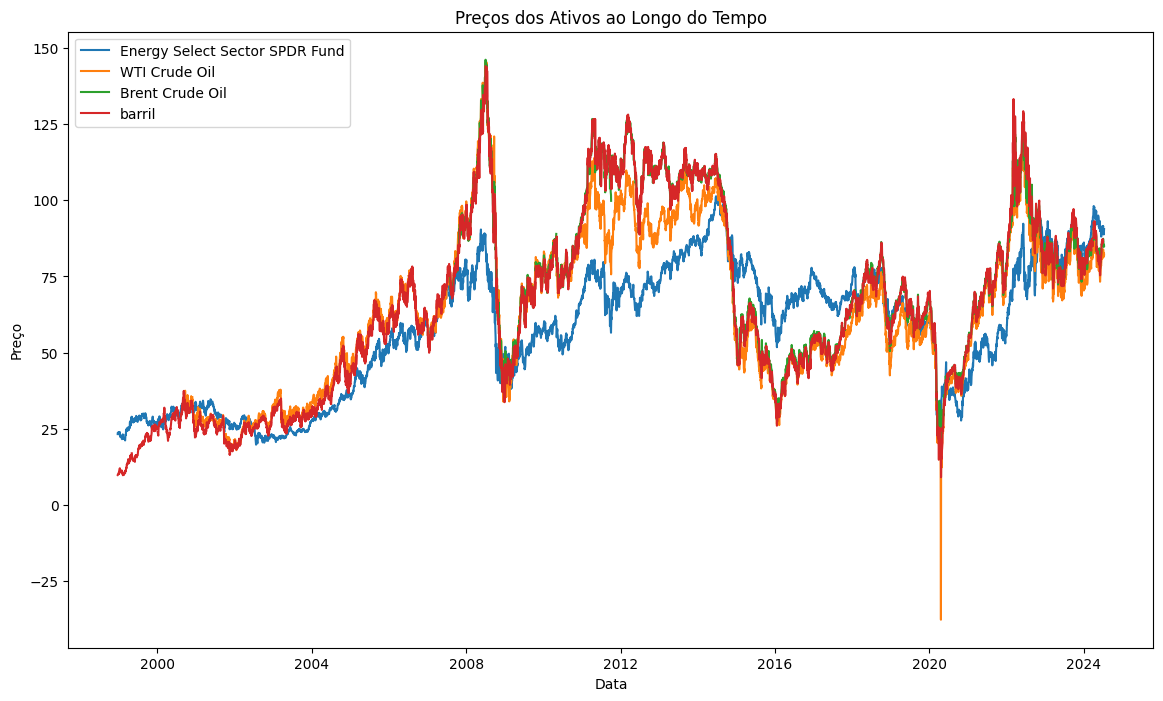

In [49]:
# Visualização de Séries Temporais
plt.figure(figsize=(14, 8))
for column in df_ativos.columns:
    if column != 'Year':  # Excluir a coluna 'Year' da visualização
        plt.plot(df_ativos.index, df_ativos[column], label=column)
plt.title('Preços dos Ativos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()


### Análise da Série Temporal

1. **Tendência de Alta de Longo Prazo (1998-2008)**:
   - Os preços dos ativos relacionados ao petróleo mostraram uma tendência de alta consistente de 1998 até 2008. Esta tendência pode estar relacionada ao crescimento econômico global e ao aumento da demanda por petróleo.

2. **Crise Financeira Global (2008-2009)**:
   - Em 2008, há uma queda acentuada nos preços dos ativos, coincidente com a crise financeira global. Esta queda foi resultado de uma contração econômica global, que reduziu a demanda por petróleo.

3. **Recuperação Pós-Crise (2009-2014)**:
   - Após a crise de 2008-2009, os preços dos ativos começaram a se recuperar, atingindo novos picos em torno de 2012-2014. Isso pode estar associado à recuperação econômica global e ao aumento da demanda por petróleo.

4. **Queda dos Preços do Petróleo (2014-2016)**:
   - Entre 2014 e 2016, os preços do petróleo caíram significativamente devido a um excesso de oferta global de petróleo, incluindo o aumento da produção de petróleo de xisto nos Estados Unidos.

5. **Oscilações e Recuperação (2016-2019)**:
   - Após a queda de 2014-2016, os preços dos ativos mostraram oscilações, mas mantiveram uma tendência de recuperação moderada até 2019.

6. **Impacto da Pandemia de COVID-19 (2020)**:
   - Em 2020, há uma queda abrupta e temporária nos preços do petróleo, coincidindo com a pandemia de COVID-19. Isso resultou em uma queda drástica na demanda por petróleo devido a lockdowns globais e restrições de viagens, levando até a preços negativos em contratos futuros de petróleo, como observado no WTI Crude Oil.

7. **Recuperação Pós-Pandemia (2021-2024)**:
   - Após o impacto inicial da pandemia, os preços dos ativos voltaram a subir conforme a demanda por petróleo começou a se recuperar. Esta recuperação é visível na série temporal até 2024.

### Insights Específicos:

- **Correlação entre Ativos**:
  - Os preços dos diferentes ativos (Energy Select Sector SPDR Fund, WTI Crude Oil, Brent Crude Oil, e o preço do barril de petróleo Brent) tendem a se mover juntos, indicando alta correlação entre eles. Isso pode ser visto nas tendências e oscilações similares ao longo do tempo.
  
- **Volatilidade**:
  - A volatilidade é evidente em vários períodos, especialmente durante crises econômicas e eventos globais significativos, como a crise financeira de 2008 e a pandemia de COVID-19 em 2020.

- **Resiliência e Recuperação**:
  - O mercado de petróleo mostrou resiliência, com preços se recuperando após quedas significativas. A recuperação pós-crise financeira e pós-pandemia são exemplos notáveis dessa resiliência.